In [120]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid
import os
import numpy as np
import os
from pathlib import Path
import cv2
import PIL

In [63]:
def visualize_maps(map_dir='.'):
    paths = sorted(Path(map_dir).iterdir(), key=os.path.getmtime)
    map_names = [str(name) for name in paths if 'obstacle_map' in str(name)]
    map_names = map_names[:10]

    fig = plt.figure(figsize=(20., 8.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(5, 2),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    maps = []
    for name in map_names:
        print(name)
        obs_map = np.loadtxt(os.path.join(map_dir, name))
        map_scale = 40

        # plt.imshow(obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale])
        maps.append(obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale])
        obs_map = obs_map > 128

        maps.append(obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale])
        
    for ax, im in zip(grid, maps):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)

    plt.show()

In [147]:
def visualize_maps_and_scene(map_dir='.', n_maps=10, num_to_skip=0, get_from_back=False):
    paths = sorted(Path(map_dir).iterdir(), key=os.path.getmtime)
    map_names = [str(name) for name in paths if 'obstacle_map_159' in str(name)]
    rgb_names = [str(name) for name in paths if 'rgb' in str(name)]
    depth_names = [str(name) for name in paths if 'depth' in str(name)]

    if get_from_back:
        map_names = map_names[-(num_to_skip + n_maps):(-num_to_skip or None)]
        rgb_names = rgb_names[-(num_to_skip + n_maps):(-num_to_skip or None)]
        depth_names = depth_names[-(num_to_skip + n_maps):(-num_to_skip or None)]
    else:
        map_names = map_names[num_to_skip:num_to_skip + n_maps]
        rgb_names = rgb_names[num_to_skip:num_to_skip + n_maps]
        depth_names = depth_names[num_to_skip:num_to_skip + n_maps]

    fig = plt.figure(figsize=(6 * 4., 6 * n_maps))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_maps, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    maps = []
    for i, name in enumerate(map_names):
        print(name)
        obs_map = np.loadtxt(name)
        map_scale = 80

        # plt.imshow(obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale])
        cont_map = obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale]
        cont_map = cv2.resize(cont_map, (480, 480))
        maps.append(cont_map)
        thres_map = (obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale]
                     > 128).astype(float)

        thres_map = cv2.resize(thres_map, (480, 480)).round().astype(int)
        maps.append(thres_map)
        
        if '.npy' in rgb_names[i]:
            maps.append(np.load(rgb_names[i]))
        else:
            maps.append(np.array(PIL.Image.open(rgb_names[i])))
        if '.npy' in depth_names[i]:
            maps.append(np.load(depth_names[i]).squeeze(2))
        else:
            maps.append(np.array(PIL.Image.open(depth_names[i])))
        
    for ax, im in zip(grid, maps):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
    
    suffix = '_'.join(map_names[0].split('_')[-2:]).split('.')[0]
    fig.tight_layout()
    plt.savefig('maps/visualizations/' + suffix + '.png')
    plt.show()

maps/objectgoal/obstacle_map_1591010176_48624.csv
maps/objectgoal/obstacle_map_1591010177_90662.csv
maps/objectgoal/obstacle_map_1591010177_105223.csv
maps/objectgoal/obstacle_map_1591010177_113806.csv
maps/objectgoal/obstacle_map_1591010178_130882.csv
maps/objectgoal/obstacle_map_1591010178_165780.csv
maps/objectgoal/obstacle_map_1591010178_215774.csv
maps/objectgoal/obstacle_map_1591010179_262326.csv
maps/objectgoal/obstacle_map_1591010179_299184.csv
maps/objectgoal/obstacle_map_1591010179_343538.csv
maps/objectgoal/obstacle_map_1591010180_375910.csv
maps/objectgoal/obstacle_map_1591010180_409734.csv
maps/objectgoal/obstacle_map_1591010180_456236.csv
maps/objectgoal/obstacle_map_1591010181_504175.csv
maps/objectgoal/obstacle_map_1591010181_560701.csv
maps/objectgoal/obstacle_map_1591010181_614165.csv
maps/objectgoal/obstacle_map_1591010182_656972.csv
maps/objectgoal/obstacle_map_1591010182_694583.csv
maps/objectgoal/obstacle_map_1591010182_731112.csv
maps/objectgoal/obstacle_map_1591

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.7/site-packages/ipykernel/__main__.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


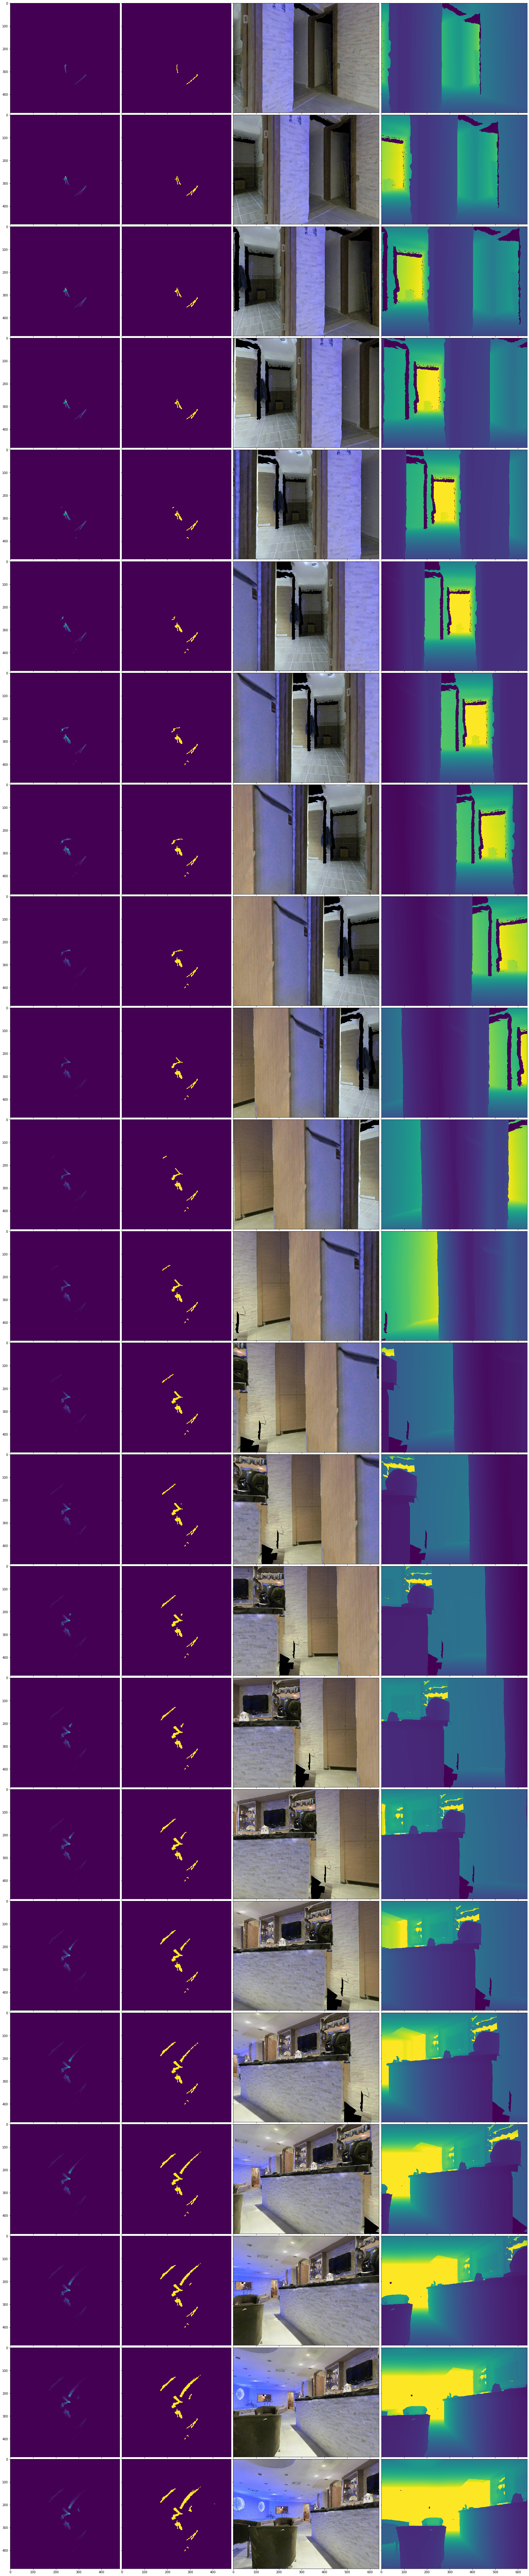

In [148]:
visualize_maps_and_scene('maps/objectgoal', num_to_skip=0, n_maps=23, get_from_back=True)

In [24]:
obs_map = np.loadtxt("obstacle_map_tensor(102959., device='cuda:0').csv")
obs_map.shape, obs_map.sum()

((400, 400), 102959.0)

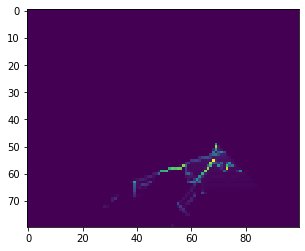

In [25]:
map_scale = 40
plt.imshow(obs_map[200-map_scale:200+map_scale, 180-map_scale:200+map_scale])

In [31]:
np.maxiumum(obs_map, 10)

AttributeError: module 'numpy' has no attribute 'maxiumum'

In [35]:
sorted(obs_map.flatten(), reverse=True)

[2582.0,
 2361.0,
 2202.0,
 2184.0,
 2156.0,
 2123.0,
 2053.0,
 1997.0,
 1962.0,
 1951.0,
 1860.0,
 1805.0,
 1785.0,
 1739.0,
 1669.0,
 1669.0,
 1652.0,
 1648.0,
 1470.0,
 1417.0,
 1335.0,
 1325.0,
 1314.0,
 1294.0,
 1281.0,
 1245.0,
 1179.0,
 1089.0,
 1083.0,
 1039.0,
 1022.0,
 974.0,
 944.0,
 910.0,
 891.0,
 876.0,
 840.0,
 802.0,
 796.0,
 775.0,
 761.0,
 746.0,
 744.0,
 725.0,
 673.0,
 645.0,
 594.0,
 587.0,
 559.0,
 557.0,
 548.0,
 546.0,
 532.0,
 532.0,
 531.0,
 527.0,
 485.0,
 483.0,
 481.0,
 480.0,
 478.0,
 435.0,
 435.0,
 419.0,
 414.0,
 405.0,
 390.0,
 385.0,
 382.0,
 381.0,
 378.0,
 378.0,
 370.0,
 355.0,
 350.0,
 333.0,
 328.0,
 328.0,
 309.0,
 305.0,
 298.0,
 276.0,
 266.0,
 260.0,
 260.0,
 257.0,
 253.0,
 250.0,
 248.0,
 248.0,
 243.0,
 232.0,
 219.0,
 216.0,
 214.0,
 210.0,
 209.0,
 206.0,
 199.0,
 194.0,
 194.0,
 191.0,
 187.0,
 185.0,
 183.0,
 178.0,
 177.0,
 177.0,
 171.0,
 167.0,
 167.0,
 166.0,
 164.0,
 154.0,
 154.0,
 153.0,
 151.0,
 147.0,
 147.0,
 145.0,
 145.0,
 